In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Download the train.pkl test.pkl files first
df = pd.read_pickle("train.pkl")
df_test = pd.read_pickle("test.pkl")
df.head()

PM2.5_target       PM2.5       CO  CO2     NO  \
date       city                                                       
2015-01-01 Patna               NaN         NaN      NaN  NaN    NaN   
           Delhi        419.183333  405.463333  10.5575  NaN  67.76   
           Ahmedabad           NaN         NaN   8.6000  NaN   0.81   
           Bengaluru           NaN         NaN   2.0950  NaN   2.04   
           Mumbai              NaN         NaN   0.0000  NaN    NaN   

                            NO2         NOx     NH3         SO2   Temp  ...  \
date       city                                                         ...   
2015-01-01 Patna            NaN         NaN     NaN         NaN    NaN  ...   
           Delhi      29.528333  161.876667  27.535    3.076667  11.71  ...   
           Ahmedabad  36.900000   34.770000     NaN  118.850000    NaN  ...   
           Bengaluru  14.266667    7.575000  19.100    4.050000  25.30  ...   
           Mumbai           NaN   24.350000     NaN         NaN    NaN  ...   

                      SPM     SR     THC    Toluene   VWS     WD        WS  \
date       city                                                              
2015-01-01 Patna      NaN    NaN     NaN        NaN   NaN    NaN       NaN   
           Delhi      NaN  25.76  319.55  58.566667  0.12  93.87  0.573333   
           Ahmedabad  NaN   0.59     NaN   0.000000  0.59    NaN  0.600000   
           Bengaluru  NaN   1.50     NaN   3.430000  0.38    NaN  0.380000   
           Mumbai     NaN    NaN     NaN   0.000000  0.00    NaN       NaN   

                      Xylene   Latitude  Longitude  
date       city                                     
2015-01-01 Patna         NaN  25.609324  85.123525  
           Delhi        13.8  28.627393  77.171695  
           Ahmedabad     0.0  23.021624  72.579707  
           Bengaluru     NaN  12.976794  77.590082  
           Mumbai        0.0  19.078545  72.878176  

[5 rows x 35 columns]

In [3]:
cities = sorted(df.index.get_level_values("city").unique())

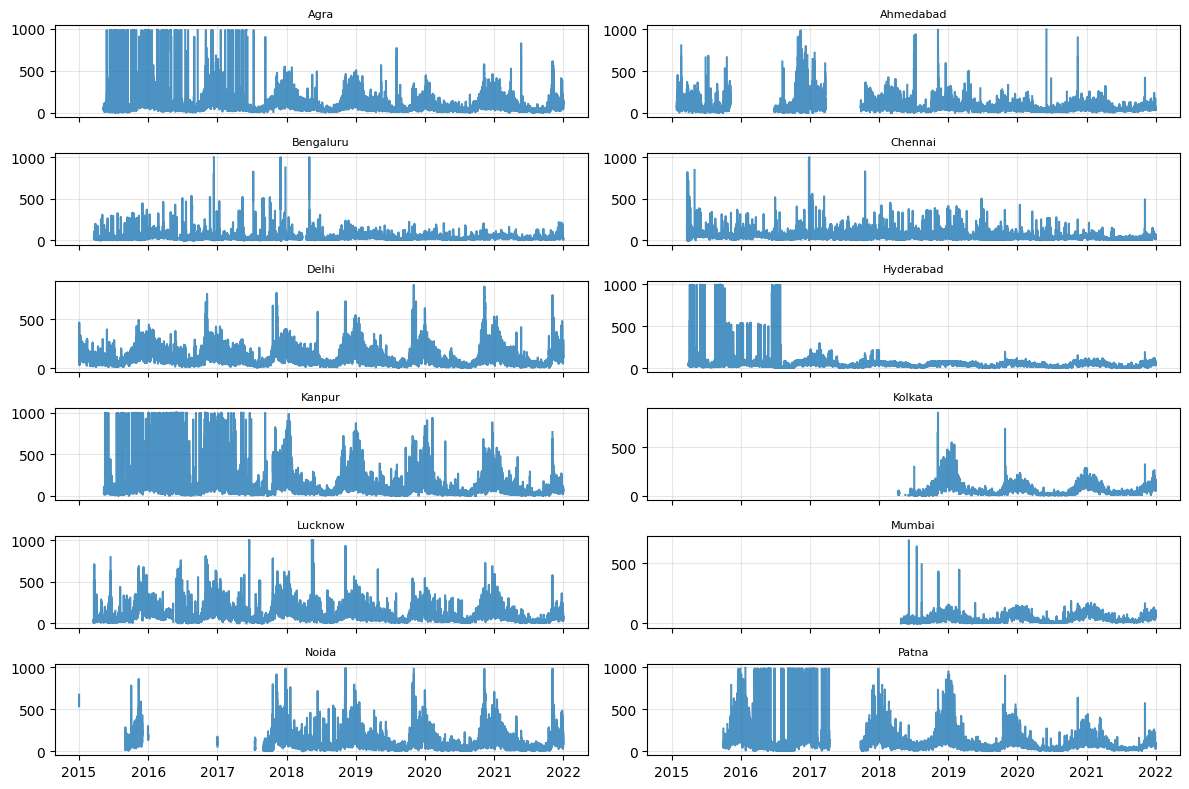

In [4]:
# By city, plot the PM2.5 values over time
fig, axs = plt.subplots(len(cities) // 2, 2, figsize=(12, 8), sharex=True)

for i, city in enumerate(cities):
    dfp = df.xs(city, level="city")
    axs.flatten()[i].plot(dfp.index, dfp["PM2.5_target"], label=city, alpha=0.8)
    axs.flatten()[i].grid(alpha=0.3)
    axs.flatten()[i].set_title(city, fontsize=8)

fig.tight_layout()

In [5]:
set(df_test.columns) - set(df.columns)

set()

In [6]:
set(df.columns) - set(df_test.columns)

{'PM2.5', 'PM2.5_target'}

In [7]:
df_test.index.get_level_values("date").unique()

DatetimeIndex(['2022-01-01 00:00:00', '2022-01-01 01:00:00',
               '2022-01-01 02:00:00', '2022-01-01 03:00:00',
               '2022-01-01 04:00:00', '2022-01-01 05:00:00',
               '2022-01-01 06:00:00', '2022-01-01 07:00:00',
               '2022-01-01 08:00:00', '2022-01-01 09:00:00',
               ...
               '2023-03-31 13:00:00', '2023-03-31 14:00:00',
               '2023-03-31 15:00:00', '2023-03-31 16:00:00',
               '2023-03-31 17:00:00', '2023-03-31 18:00:00',
               '2023-03-31 19:00:00', '2023-03-31 20:00:00',
               '2023-03-31 21:00:00', '2023-03-31 22:00:00'],
              dtype='datetime64[ns]', name='date', length=10919, freq=None)

In [10]:
# Make prediction on test set
pred = 0 # Predict zero everywhere
df_test["PM2.5_target"] = pred

final_prediction = df_test[["PM2.5_target"]]

In [11]:
# Shape of final prediction. Notice the MultiIndex is the same as the test set
final_prediction

PM2.5_target
date                city                   
2022-01-01 00:00:00 Patna                 0
                    Delhi                 0
                    Ahmedabad             0
                    Bengaluru             0
                    Mumbai                0
...                                     ...
2023-03-31 22:00:00 Agra                  0
                    Kanpur                0
                    Lucknow               0
                    Noida                 0
                    Kolkata               0

[131028 rows x 1 columns]

In [12]:
# Save to a .pkl file, send me this file by email
final_prediction.to_pickle("prediction_group_01.pkl")